

Recurrent Neural Networks (RNN) are very effective for Natural Language Processing and other sequence tasks because they have "memory." They can read inputs $x^{\langle t \rangle}$ (such as words) one at a time, and remember some contextual information through the hidden layer activations that get passed from one time step to the next. This allows a unidirectional (one-way) RNN to take information from the past to process later inputs. A bidirectional (two-way) RNN can take context from both the past and the future, much like Marty McFly.

**Notation**:
- Superscript $[l]$ denotes an object associated with the $l^{th}$ layer.

- Superscript $(i)$ denotes an object associated with the $i^{th}$ example.

- Superscript $\langle t \rangle$ denotes an object at the $t^{th}$ time
step.
    
- Subscript $i$ denotes the $i^{th}$ entry of a vector.

**Example**:  
- $a^{(2)[3]<4>}_5$ denotes the activation of the 2nd training example (2), 3rd layer [3], 4th time step <4>, and 5th entry in the vector.

#### Pre-requisites
* You should already be familiar with `numpy`

    
#### Be careful when modifying the starter code!
* When working on graded functions, please remember to only modify the code that is between:
```Python
#### START CODE HERE
```
and:
```Python
#### END CODE HERE
```
* In particular, avoid modifying the first line of graded routines. These start with:
```Python
# GRADED FUNCTION: routine_name
```
The automatic grader (autograder) needs these to locate the function - so even a change in spacing will cause issues with the autograder, returning 'failed' if any of these are modified or missing. Now, let's get started!

## Table of Content

- [Packages](#0)
- [1 - Forward Propagation for the Basic Recurrent Neural Network](#1)
    - [1.1 - RNN Cell](#1-1)
        - [Exercise 1 - rnn_cell_forward](#ex-1)
    - [1.2 - RNN Forward Pass](#1-2)
        - [Exercise 2 - rnn_forward](#ex-2)

      
- [2 - Backpropagation in Recurrent Neural Networks (OPTIONAL / UNGRADED)](#3)
    - [2.1 - Basic RNN Backward Pass](#3-1)
        - [Exercise 3 - rnn_cell_backward](#ex-5)
        - [Exercise 4 - rnn_backward](#ex-6)

<a name='0'></a>
## Packages

In [ ]:
import numpy as np
from utils import *
from public_tests import *

<a name='1'></a>
## 1 - Forward Propagation for the Basic Recurrent Neural Network

Later this week, you'll get a chance to generate music using an RNN! The basic RNN that you'll implement has the following structure:

In this example, $T_x = T_y$.

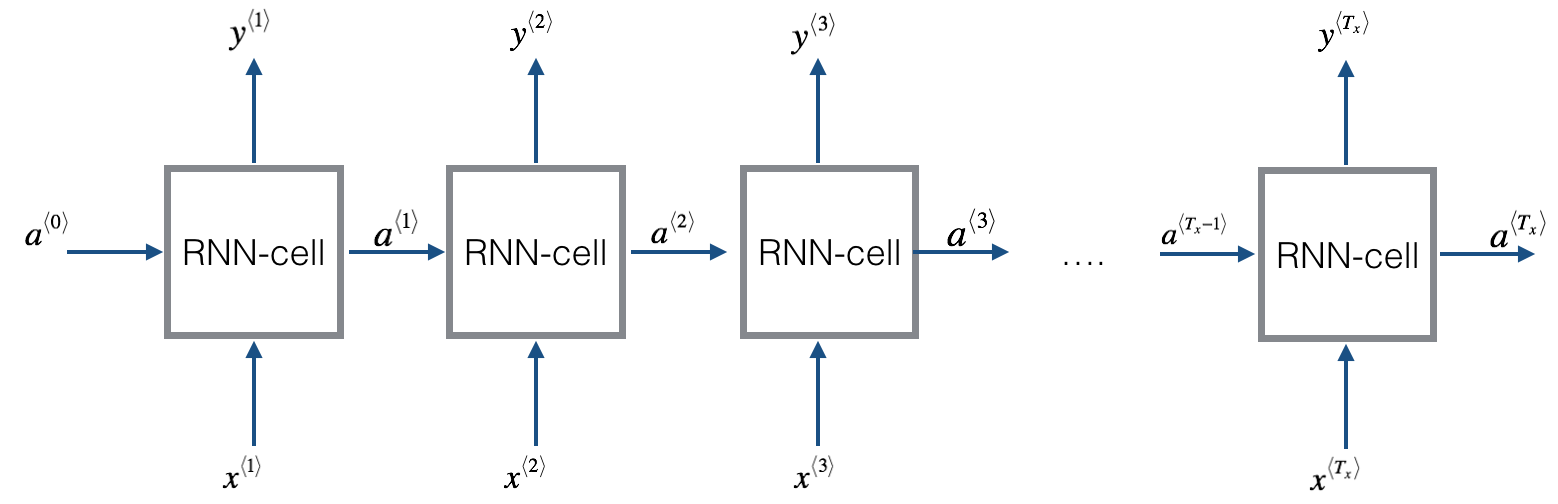

### Dimensions of input $x$

#### Input with $n_x$ number of units
* For a single time step of a single input example, $x^{(i) \langle t \rangle }$ is a one-dimensional input vector
* Using language as an example, a language with a 5000-word vocabulary could be one-hot encoded into a vector that has 5000 units.  So $x^{(i)\langle t \rangle}$ would have the shape (5000,)  
* The notation $n_x$ is used here to denote the number of units in a single time step of a single training example

#### Time steps of size $T_{x}$
* A recurrent neural network has multiple time steps, which you'll index with $t$.
* In the lessons, you saw a single training example $x^{(i)}$ consisting of multiple time steps $T_x$. In this notebook, $T_{x}$ will denote the number of timesteps in the longest sequence.

#### Batches of size $m$
* Let's say we have mini-batches, each with 20 training examples  
* To benefit from vectorization, you'll stack 20 columns of $x^{(i)}$ examples
* For example, this tensor has the shape (5000,20,10)
* You'll use $m$ to denote the number of training examples  
* So, the shape of a mini-batch is $(n_x,m,T_x)$

#### 3D Tensor of shape $(n_{x},m,T_{x})$
* The 3-dimensional tensor $x$ of shape $(n_x,m,T_x)$ represents the input $x$ that is fed into the RNN

#### Taking a 2D slice for each time step: $x^{\langle t \rangle}$
* At each time step, you'll use a mini-batch of training examples (not just a single example)
* So, for each time step $t$, you'll use a 2D slice of shape $(n_x,m)$
* This 2D slice is referred to as $x^{\langle t \rangle}$.  The variable name in the code is `xt`.

### Definition of hidden state $a$

* The activation $a^{\langle t \rangle}$ that is passed to the RNN from one time step to another is called a "hidden state."

### Dimensions of hidden state $a$

* Similar to the input tensor $x$, the hidden state for a single training example is a vector of length $n_{a}$
* If you include a mini-batch of $m$ training examples, the shape of a mini-batch is $(n_{a},m)$
* When you include the time step dimension, the shape of the hidden state is $(n_{a}, m, T_x)$
* You'll loop through the time steps with index $t$, and work with a 2D slice of the 3D tensor  
* This 2D slice is referred to as $a^{\langle t \rangle}$
* In the code, the variable names used are either `a_prev` or `a_next`, depending on the function being implemented
* The shape of this 2D slice is $(n_{a}, m)$

### Dimensions of prediction $\hat{y}$
* Similar to the inputs and hidden states, $\hat{y}$ is a 3D tensor of shape $(n_{y}, m, T_{y})$
    * $n_{y}$: number of units in the vector representing the prediction
    * $m$: number of examples in a mini-batch
    * $T_{y}$: number of time steps in the prediction
* For a single time step $t$, a 2D slice $\hat{y}^{\langle t \rangle}$ has shape $(n_{y}, m)$
* In the code, the variable names are:
    - `y_pred`: $\hat{y}$
    - `yt_pred`: $\hat{y}^{\langle t \rangle}$

Here's how you can implement an RNN:

### Steps:
1. Implement the calculations needed for one time step of the RNN.
2. Implement a loop over $T_x$ time steps in order to process all the inputs, one at a time.

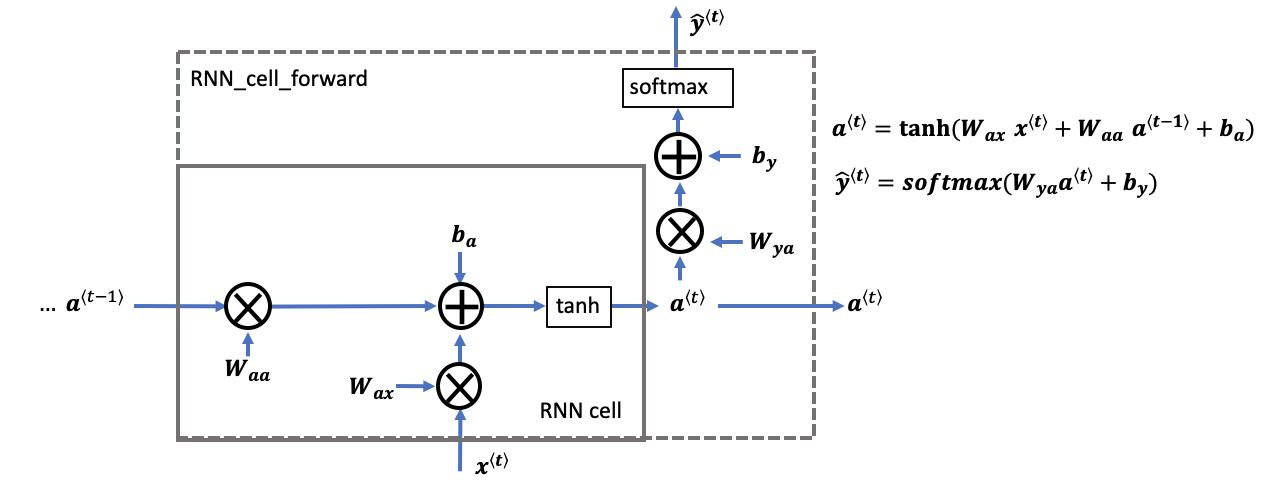

<a name='ex-1'></a>
### Exercise 1 - rnn_cell_forward

Implement the RNN cell described in Figure 2.

**Instructions**:
1. Compute the hidden state with tanh activation: $a^{\langle t \rangle} = \tanh(W_{aa} a^{\langle t-1 \rangle} + W_{ax} x^{\langle t \rangle} + b_a)$
2. Using your new hidden state $a^{\langle t \rangle}$, compute the prediction $\hat{y}^{\langle t \rangle} = softmax(W_{ya} a^{\langle t \rangle} + b_y)$. (The function `softmax` is provided)
3. Store $(a^{\langle t \rangle}, a^{\langle t-1 \rangle}, x^{\langle t \rangle}, parameters)$ in a `cache`
4. Return $a^{\langle t \rangle}$ , $\hat{y}^{\langle t \rangle}$ and `cache`

#### Additional Hints
* A little more information on [numpy.tanh](https://numpy.org/devdocs/reference/generated/numpy.tanh.html)
* In this assignment, there's an existing `softmax` function for you to use.  It's located in the file 'rnn_utils.py' and has already been imported.
* For matrix multiplication, use [numpy.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)


In [ ]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: rnn_cell_forward

def rnn_cell_forward(xt, a_prev, parameters):
    """
    Implements a single forward step of the RNN-cell as described in Figure (2)

    Arguments:
    xt -- your input data at timestep "t", numpy array of shape (n_x, m).
    a_prev -- Hidden state at timestep "t-1", numpy array of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        ba --  Bias, numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
    Returns:
    a_next -- next hidden state, of shape (n_a, m)
    yt_pred -- prediction at timestep "t", numpy array of shape (n_y, m)
    cache -- tuple of values needed for the backward pass, contains (a_next, a_prev, xt, parameters)
    """

    # Retrieve parameters from "parameters"
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]

    ### START CODE HERE ### (≈2 lines)
    # compute next activation state using the formula given above
    a_next = np.tanh(np.dot(Wax, xt) + np.dot(Waa, a_prev) + ba)
    # compute output of the current cell using the formula given above
    yt_pred = softmax(np.dot(Wya, a_next) + by)
    ### END CODE HERE ###

    # store values you need for backward propagation in cache
    cache = (a_next, a_prev, xt, parameters)

    return a_next, yt_pred, cache

In [ ]:
np.random.seed(1)
xt_tmp = np.random.randn(3, 10)
a_prev_tmp = np.random.randn(5, 10)
parameters_tmp = {}
parameters_tmp['Waa'] = np.random.randn(5, 5)
parameters_tmp['Wax'] = np.random.randn(5, 3)
parameters_tmp['Wya'] = np.random.randn(2, 5)
parameters_tmp['ba'] = np.random.randn(5, 1)
parameters_tmp['by'] = np.random.randn(2, 1)

a_next_tmp, yt_pred_tmp, cache_tmp = rnn_cell_forward(xt_tmp, a_prev_tmp, parameters_tmp)
print("a_next[4] = \n", a_next_tmp[4])
print("a_next.shape = \n", a_next_tmp.shape)
print("yt_pred[1] =\n", yt_pred_tmp[1])
print("yt_pred.shape = \n", yt_pred_tmp.shape)

# UNIT TESTS
rnn_cell_forward_tests(rnn_cell_forward)

a_next[4] = 
 [ 0.59584544  0.18141802  0.61311866  0.99808218  0.85016201  0.99980978
 -0.18887155  0.99815551  0.6531151   0.82872037]
a_next.shape = 
 (5, 10)
yt_pred[1] =
 [0.9888161  0.01682021 0.21140899 0.36817467 0.98988387 0.88945212
 0.36920224 0.9966312  0.9982559  0.17746526]
yt_pred.shape = 
 (2, 10)
All tests passed


**Expected Output**:
```Python
a_next[4] =
 [ 0.59584544  0.18141802  0.61311866  0.99808218  0.85016201  0.99980978
 -0.18887155  0.99815551  0.6531151   0.82872037]
a_next.shape =
 (5, 10)
yt_pred[1] =
 [ 0.9888161   0.01682021  0.21140899  0.36817467  0.98988387  0.88945212
  0.36920224  0.9966312   0.9982559   0.17746526]
yt_pred.shape =
 (2, 10)

```

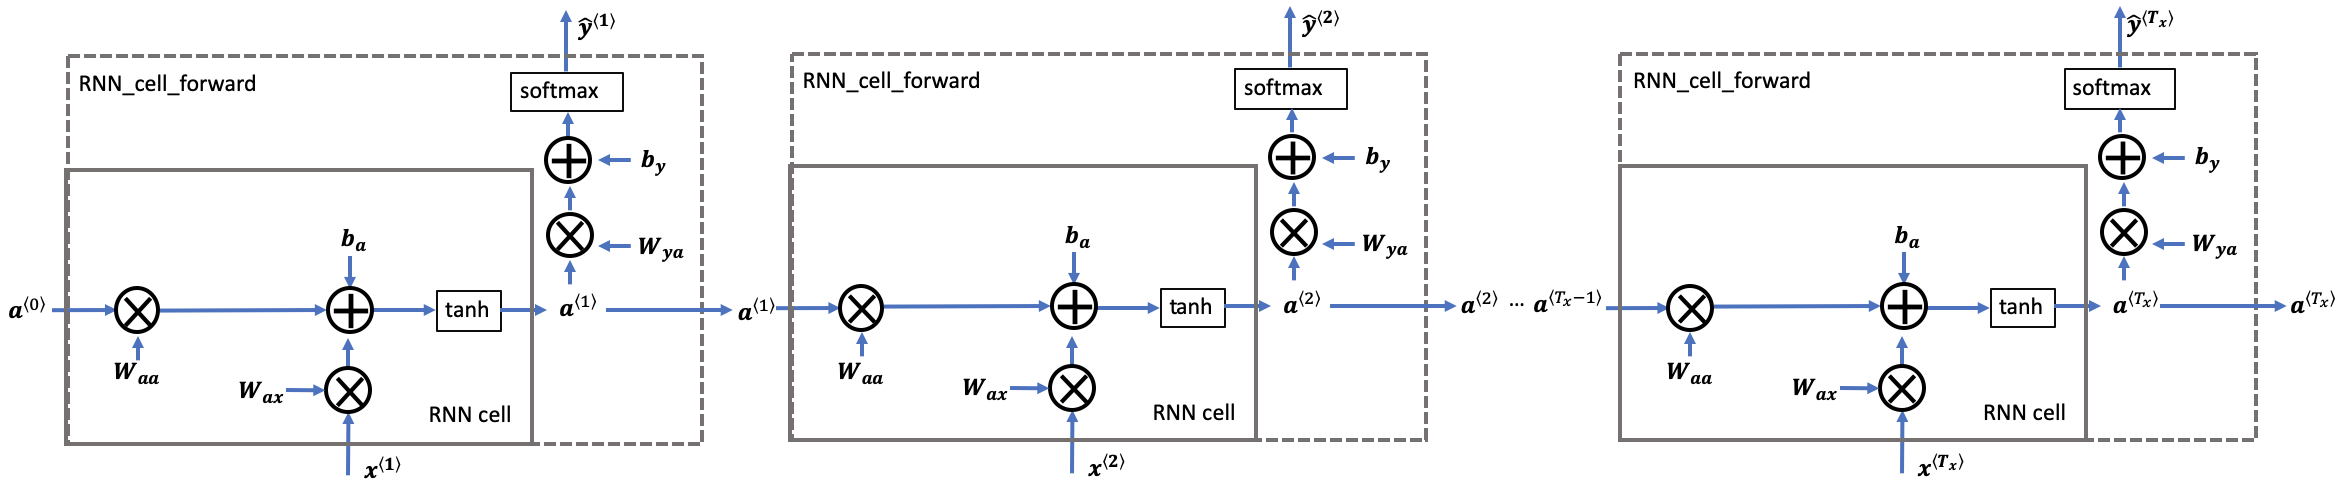


<a name='ex-2'></a>
### Exercise 2 - rnn_forward

Implement the forward propagation of the RNN described in Figure 3.

**Instructions**:
* Create a 3D array of zeros, $a$ of shape $(n_{a}, m, T_{x})$ that will store all the hidden states computed by the RNN
* Create a 3D array of zeros, $\hat{y}$, of shape $(n_{y}, m, T_{x})$ that will store the predictions  
    - Note that in this case, $T_{y} = T_{x}$ (the prediction and input have the same number of time steps)
* Initialize the 2D hidden state `a_next` by setting it equal to the initial hidden state, $a_{0}$
* At each time step $t$:
    - Get $x^{\langle t \rangle}$, which is a 2D slice of $x$ for a single time step $t$
        - $x^{\langle t \rangle}$ has shape $(n_{x}, m)$
        - $x$ has shape $(n_{x}, m, T_{x})$
    - Update the 2D hidden state $a^{\langle t \rangle}$ (variable name `a_next`), the prediction $\hat{y}^{\langle t \rangle}$ and the cache by running `rnn_cell_forward`
        - $a^{\langle t \rangle}$ has shape $(n_{a}, m)$
    - Store the 2D hidden state in the 3D tensor $a$, at the $t^{th}$ position
        - $a$ has shape $(n_{a}, m, T_{x})$
    - Store the 2D $\hat{y}^{\langle t \rangle}$ prediction (variable name `yt_pred`) in the 3D tensor $\hat{y}_{pred}$ at the $t^{th}$ position
        - $\hat{y}^{\langle t \rangle}$ has shape $(n_{y}, m)$
        - $\hat{y}$ has shape $(n_{y}, m, T_x)$
    - Append the cache to the list of caches
* Return the 3D tensor $a$ and $\hat{y}$, as well as the list of caches

#### Additional Hints
- Some helpful documentation on [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html)
- If you have a 3 dimensional numpy array and are indexing by its third dimension, you can use array slicing like this: `var_name[:,:,i]`

In [ ]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: rnn_forward

def rnn_forward(x, a0, parameters):
    """
    Implement the forward propagation of the recurrent neural network described in Figure (3).

    Arguments:
    x -- Input data for every time-step, of shape (n_x, m, T_x).
    a0 -- Initial hidden state, of shape (n_a, m)
    parameters -- python dictionary containing:
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        ba --  Bias numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)

    Returns:
    a -- Hidden states for every time-step, numpy array of shape (n_a, m, T_x)
    y_pred -- Predictions for every time-step, numpy array of shape (n_y, m, T_x)
    caches -- tuple of values needed for the backward pass, contains (list of caches, x)
    """

    # Initialize "caches" which will contain the list of all caches
    caches = []

    # Retrieve dimensions from shapes of x and Wy
    n_x, m, T_x = x.shape
    n_y, n_a = parameters["Wya"].shape

    ### START CODE HERE ###

    # initialize "a" and "y" with zeros (≈2 lines)
    a = np.zeros((n_a, m, T_x))
    y_pred = np.zeros((n_y, m, T_x))

    # Initialize a_next (≈1 line)
    a_next = a0

    # loop over all time-steps
    for t in range(T_x):
        # Update next hidden state, compute the prediction, get the cache (≈1 line)
        a_next, yt_pred, cache = rnn_cell_forward(x[:,:,t], a_next, parameters)
        # Save the value of the new "next" hidden state in a (≈1 line)
        a[:,:,t] = a_next
        # Save the value of the prediction in y (≈1 line)
        y_pred[:,:,t] = yt_pred
        # Append "cache" to "caches" (≈1 line)
        caches.append(cache)

    ### END CODE HERE ###

    # store values needed for backward propagation in cache
    caches = (caches, x)

    return a, y_pred, caches

In [ ]:
np.random.seed(1)
x_tmp = np.random.randn(3, 10, 4)
a0_tmp = np.random.randn(5, 10)
parameters_tmp = {}
parameters_tmp['Waa'] = np.random.randn(5, 5)
parameters_tmp['Wax'] = np.random.randn(5, 3)
parameters_tmp['Wya'] = np.random.randn(2, 5)
parameters_tmp['ba'] = np.random.randn(5, 1)
parameters_tmp['by'] = np.random.randn(2, 1)

a_tmp, y_pred_tmp, caches_tmp = rnn_forward(x_tmp, a0_tmp, parameters_tmp)
print("a[4][1] = \n", a_tmp[4][1])
print("a.shape = \n", a_tmp.shape)
print("y_pred[1][3] =\n", y_pred_tmp[1][3])
print("y_pred.shape = \n", y_pred_tmp.shape)
print("caches[1][1][3] =\n", caches_tmp[1][1][3])
print("len(caches) = \n", len(caches_tmp))

#UNIT TEST
rnn_forward_test(rnn_forward)

a[4][1] = 
 [-0.99999375  0.77911235 -0.99861469 -0.99833267]
a.shape = 
 (5, 10, 4)
y_pred[1][3] =
 [0.79560373 0.86224861 0.11118257 0.81515947]
y_pred.shape = 
 (2, 10, 4)
caches[1][1][3] =
 [-1.1425182  -0.34934272 -0.20889423  0.58662319]
len(caches) = 
 2
All tests passed


**Expected Output**:

```Python
a[4][1] =
 [-0.99999375  0.77911235 -0.99861469 -0.99833267]
a.shape =
 (5, 10, 4)
y_pred[1][3] =
 [ 0.79560373  0.86224861  0.11118257  0.81515947]
y_pred.shape =
 (2, 10, 4)
caches[1][1][3] =
 [-1.1425182  -0.34934272 -0.20889423  0.58662319]
len(caches) =
 2
```

### Congratulations!

You've successfully built the forward propagation of a recurrent neural network from scratch. Nice work!

#### Situations when this RNN will perform better:
- This will work well enough for some applications, but it suffers from vanishing gradients.
- The RNN works best when each output $\hat{y}^{\langle t \rangle}$ can be estimated using "local" context.  
- "Local" context refers to information that is close to the prediction's time step $t$.
- More formally, local context refers to inputs $x^{\langle t' \rangle}$ and predictions $\hat{y}^{\langle t \rangle}$ where $t'$ is close to $t$.

<font color='blue'><b>What you should remember:</b>
* The recurrent neural network, or RNN, is essentially the repeated use of a single cell.
* A basic RNN reads inputs one at a time, and remembers information through the hidden layer activations (hidden states) that are passed from one time step to the next.
    * The time step dimension determines how many times to re-use the RNN cell
* Each cell takes two inputs at each time step:
    * The hidden state from the previous cell
    * The current time step's input data
* Each cell has two outputs at each time step:
    * A hidden state
    * A prediction
</font>


<a name='3'></a>    
## 2 - Backpropagation in Recurrent Neural Networks
In modern deep learning frameworks, you only have to implement the forward pass, and the framework takes care of the backward pass, so most deep learning engineers do not need to bother with the details of the backward pass. If, however, you are an expert in calculus (or are just curious) and want to see the details of backprop in RNNs, you can work through this optional portion of the notebook.

When in an earlier Neural Networks you implemented a simple (fully connected) neural network, you used backpropagation to compute the derivatives with respect to the cost to update the parameters. Similarly, in recurrent neural networks you can calculate the derivatives with respect to the cost in order to update the parameters. The backprop equations are quite complicated, and so were not derived in lecture. However, they're briefly presented for your viewing pleasure below.

<b>Note:</b> This notebook does not implement the backward path from the Loss 'J' backwards to 'a'. This would have included the dense layer and softmax, which are a part of the forward path. This is assumed to be calculated elsewhere and the result passed to `rnn_backward` in 'da'. It is further assumed that loss has been adjusted for batch size (m) and division by the number of examples is NOT required here.

This section is optional and ungraded, because it's more difficult and has fewer details regarding its implementation. Note that this section only implements key elements of the full path!

Onward, brave one:

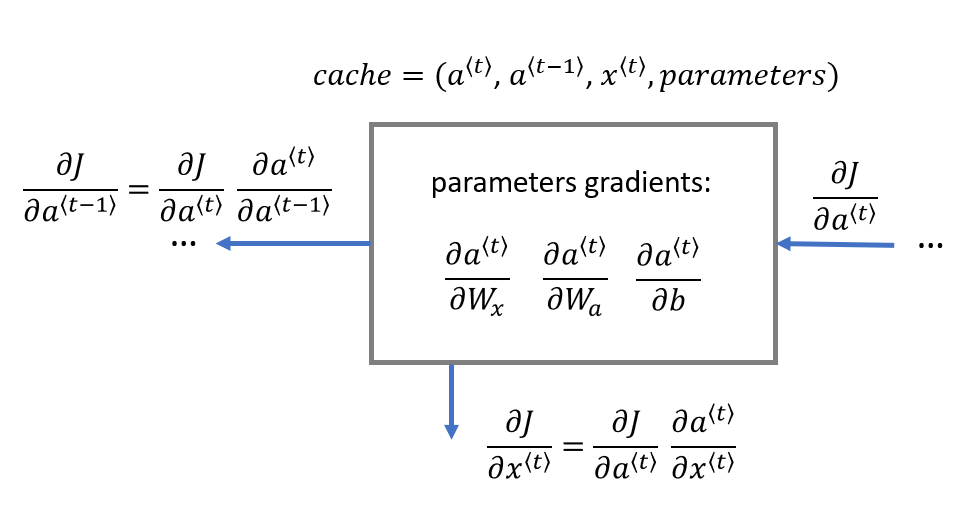

Recall from lecture that the shorthand for the partial derivative of cost relative to a variable is `dVariable`. For example, $\frac{\partial J}{\partial W_{ax}}$ is $dW_{ax}$. This will be used throughout the remaining sections.

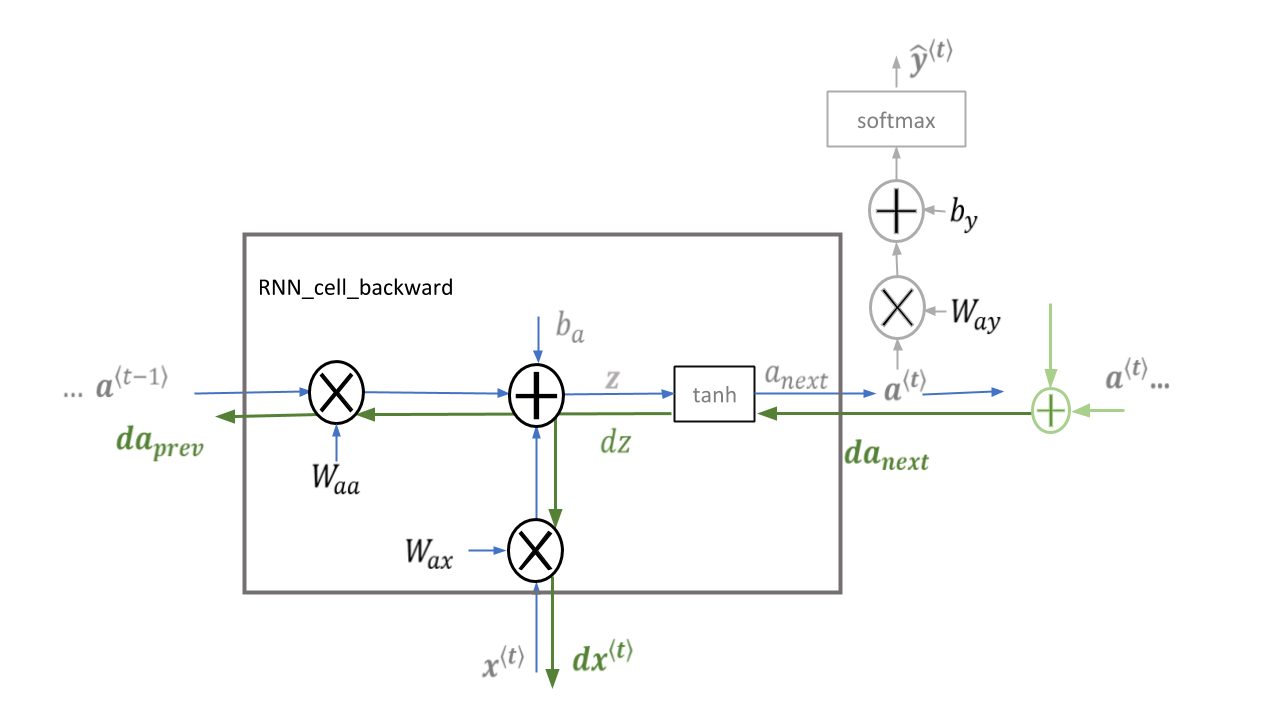

##### Equations
To compute `rnn_cell_backward`, you can use the following equations. It's a good exercise to derive them by hand. Here, $*$ denotes element-wise multiplication while the absence of a symbol indicates matrix multiplication.

\begin{align}
\displaystyle a^{\langle t \rangle} &= \tanh(W_{ax} x^{\langle t \rangle} + W_{aa} a^{\langle t-1 \rangle} + b_{a})\tag{-} \\[8pt]
\displaystyle \frac{\partial \tanh(x)} {\partial x} &= 1 - \tanh^2(x) \tag{-} \\[8pt]
\displaystyle {dtanh} &= da_{next} * ( 1 - \tanh^2(W_{ax}x^{\langle t \rangle}+W_{aa} a^{\langle t-1 \rangle} + b_{a})) \tag{0} \\[8pt]
\displaystyle  {dW_{ax}} &= dtanh \cdot x^{\langle t \rangle T}\tag{1} \\[8pt]
\displaystyle dW_{aa} &= dtanh \cdot a^{\langle t-1 \rangle T}\tag{2} \\[8pt]
\displaystyle db_a& = \sum_{batch}dtanh\tag{3} \\[8pt]
\displaystyle dx^{\langle t \rangle} &= { W_{ax}}^T \cdot dtanh\tag{4} \\[8pt]
\displaystyle da_{prev} &= { W_{aa}}^T \cdot dtanh\tag{5}
\end{align}



<a name='ex-3'></a>
### Exercise 5 - rnn_cell_backward

Implementing `rnn_cell_backward`.

The results can be computed directly by implementing the equations above. However, you have an option to simplify them by computing 'dz' and using the chain rule.  
This can be further simplified by noting that $\tanh(W_{ax}x^{\langle t \rangle}+W_{aa} a^{\langle t-1 \rangle} + b_{a})$ was computed and saved as `a_next` in the forward pass.

To calculate `dba`, the 'batch' above is a sum across all 'm' examples (axis= 1). Note that you should use the `keepdims = True` option.

**Note**: `rnn_cell_backward` does **not** include the calculation of loss from $y \langle t \rangle$. This is incorporated into the incoming `da_next`. This is a slight mismatch with `rnn_cell_forward`, which includes a dense layer and softmax.

**Note on the code**:
  
$\displaystyle dx^{\langle t \rangle}$ is represented by dxt,   
$\displaystyle d W_{ax}$ is represented by dWax,   
$\displaystyle da_{prev}$ is represented by da_prev,    
$\displaystyle dW_{aa}$ is represented by dWaa,   
$\displaystyle db_{a}$ is represented by dba,   
`dz` is not derived above but can optionally be derived by students to simplify the repeated calculations.



In [ ]:
# UNGRADED FUNCTION: rnn_cell_backward

def rnn_cell_backward(da_next, cache):
    """
    Implements the backward pass for the RNN-cell (single time-step).

    Arguments:
    da_next -- Gradient of loss with respect to next hidden state
    cache -- python dictionary containing useful values (output of rnn_cell_forward())

    Returns:
    gradients -- python dictionary containing:
                        dx -- Gradients of input data, of shape (n_x, m)
                        da_prev -- Gradients of previous hidden state, of shape (n_a, m)
                        dWax -- Gradients of input-to-hidden weights, of shape (n_a, n_x)
                        dWaa -- Gradients of hidden-to-hidden weights, of shape (n_a, n_a)
                        dba -- Gradients of bias vector, of shape (n_a, 1)
    """

    # Retrieve values from cache
    (a_next, a_prev, xt, parameters) = cache

    # Retrieve values from parameters
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]

    ### START CODE HERE ###
    # compute the gradient of tanh with respect to a_next (≈1 line)
    dtanh = (1 - a_next ** 2) * da_next

    # compute the gradient of the loss with respect to Wax (≈2 lines)
    dxt = np.dot(Wax.T, dtanh)
    dWax = np.dot(dtanh, xt.T)

    # compute the gradient with respect to Waa (≈2 lines)
    da_prev = np.dot(Waa.T, dtanh)
    dWaa = np.dot(dtanh, a_prev.T)

    # compute the gradient with respect to b (≈1 line)
    dba = np.sum(dtanh, axis = 1,keepdims=1)

    ### END CODE HERE ###

    # Store the gradients in a python dictionary
    gradients = {"dxt": dxt, "da_prev": da_prev, "dWax": dWax, "dWaa": dWaa, "dba": dba}

    return gradients

In [ ]:
np.random.seed(1)
xt_tmp = np.random.randn(3,10)
a_prev_tmp = np.random.randn(5,10)
parameters_tmp = {}
parameters_tmp['Wax'] = np.random.randn(5,3)
parameters_tmp['Waa'] = np.random.randn(5,5)
parameters_tmp['Wya'] = np.random.randn(2,5)
parameters_tmp['ba'] = np.random.randn(5,1)
parameters_tmp['by'] = np.random.randn(2,1)

a_next_tmp, yt_tmp, cache_tmp = rnn_cell_forward(xt_tmp, a_prev_tmp, parameters_tmp)

da_next_tmp = np.random.randn(5,10)
gradients_tmp = rnn_cell_backward(da_next_tmp, cache_tmp)
print("gradients[\"dxt\"][1][2] =", gradients_tmp["dxt"][1][2])
print("gradients[\"dxt\"].shape =", gradients_tmp["dxt"].shape)
print("gradients[\"da_prev\"][2][3] =", gradients_tmp["da_prev"][2][3])
print("gradients[\"da_prev\"].shape =", gradients_tmp["da_prev"].shape)
print("gradients[\"dWax\"][3][1] =", gradients_tmp["dWax"][3][1])
print("gradients[\"dWax\"].shape =", gradients_tmp["dWax"].shape)
print("gradients[\"dWaa\"][1][2] =", gradients_tmp["dWaa"][1][2])
print("gradients[\"dWaa\"].shape =", gradients_tmp["dWaa"].shape)
print("gradients[\"dba\"][4] =", gradients_tmp["dba"][4])
print("gradients[\"dba\"].shape =", gradients_tmp["dba"].shape)

gradients["dxt"][1][2] = -1.3872130506020928
gradients["dxt"].shape = (3, 10)
gradients["da_prev"][2][3] = -0.1523994937739543
gradients["da_prev"].shape = (5, 10)
gradients["dWax"][3][1] = 0.41077282493545836
gradients["dWax"].shape = (5, 3)
gradients["dWaa"][1][2] = 1.1503450668497135
gradients["dWaa"].shape = (5, 5)
gradients["dba"][4] = [0.20023491]
gradients["dba"].shape = (5, 1)


**Expected Output**:

<table>
    <tr>
        <td>
            <b>gradients["dxt"][1][2]</b> =
        </td>
        <td>
           -1.3872130506
        </td>
    </tr>
        <tr>
        <td>
            <b>gradients["dxt"].shape</b> =
        </td>
        <td>
           (3, 10)
        </td>
    </tr>
        <tr>
        <td>
            <b>gradients["da_prev"][2][3]</b> =
        </td>
        <td>
           -0.152399493774
        </td>
    </tr>
        <tr>
        <td>
            <b>gradients["da_prev"].shape</b> =
        </td>
        <td>
           (5, 10)
        </td>
    </tr>
        <tr>
        <td>
            <b>gradients["dWax"][3][1]</b> =
        </td>
        <td>
           0.410772824935
        </td>
    </tr>
            <tr>
        <td>
            <b>gradients["dWax"].shape</b> =
        </td>
        <td>
           (5, 3)
        </td>
    </tr>
        <tr>
        <td>
            <b>gradients["dWaa"][1][2]</b> =
        </td>
        <td>
           1.15034506685
        </td>
    </tr>
        <tr>
        <td>
            <b>gradients["dWaa"].shape</b> =
        </td>
        <td>
           (5, 5)
        </td>
    </tr>
        <tr>
        <td>
            <b>gradients["dba"][4]</b> =
        </td>
        <td>
           [ 0.20023491]
        </td>
    </tr>
        <tr>
        <td>
            <b>gradients["dba"].shape</b> =
        </td>
        <td>
           (5, 1)
        </td>
    </tr>
</table>

<a name='ex-4'></a>
### Exercise 6 - rnn_backward

Computing the gradients of the cost with respect to $a^{\langle t \rangle}$ at every time step $t$ is useful because it is what helps the gradient backpropagate to the previous RNN cell. To do so, you need to iterate through all the time steps starting at the end, and at each step, you increment the overall $db_a$, $dW_{aa}$, $dW_{ax}$ and you store $dx$.

**Instructions**:

Implement the `rnn_backward` function. Initialize the return variables with zeros first, and then loop through all the time steps while calling the `rnn_cell_backward` at each time time step, updating the other variables accordingly.

* Note that this notebook does not implement the backward path from the Loss 'J' backwards to 'a'.
    * This would have included the dense layer and softmax which are a part of the forward path.
    * This is assumed to be calculated elsewhere and the result passed to `rnn_backward` in 'da'.
    * You must combine this with the loss from the previous stages when calling `rnn_cell_backward` (see figure 7 above).
* It is further assumed that loss has been adjusted for batch size (m).
    * Therefore, division by the number of examples is not required here.

In [ ]:
# UNGRADED FUNCTION: rnn_backward

def rnn_backward(da, caches):
    """
    Implement the backward pass for a RNN over an entire sequence of input data.

    Arguments:
    da -- Upstream gradients of all hidden states, of shape (n_a, m, T_x)
    caches -- tuple containing information from the forward pass (rnn_forward)

    Returns:
    gradients -- python dictionary containing:
                        dx -- Gradient w.r.t. the input data, numpy-array of shape (n_x, m, T_x)
                        da0 -- Gradient w.r.t the initial hidden state, numpy-array of shape (n_a, m)
                        dWax -- Gradient w.r.t the input's weight matrix, numpy-array of shape (n_a, n_x)
                        dWaa -- Gradient w.r.t the hidden state's weight matrix, numpy-arrayof shape (n_a, n_a)
                        dba -- Gradient w.r.t the bias, of shape (n_a, 1)
    """

    ### START CODE HERE ###

    # Retrieve values from the first cache (t=1) of caches (≈2 lines)
    (caches, x) = caches
    (a1, a0, x1, parameters) = caches[0]

    # Retrieve dimensions from da's and x1's shapes (≈2 lines)
    n_a, m, T_x = da.shape
    n_x, m = x1.shape

    # initialize the gradients with the right sizes (≈6 lines)
    dx = np.zeros((n_x, m, T_x))
    dWax = np.zeros((n_a, n_x))
    dWaa = np.zeros((n_a, n_a))
    dba = np.zeros((n_a, 1))
    da0 = np.zeros((n_a, m))
    da_prevt = np.zeros((n_a, m))


    # Loop through all the time steps
    for t in reversed(range(T_x)):
        # Compute gradients at time step t. Choose wisely the "da_next" and the "cache" to use in the backward propagation step. (≈1 line)
        gradients = rnn_cell_backward(da[:,:,t] + da_prevt, caches[t])
        # Retrieve derivatives from gradients (≈ 1 line)
        dxt, da_prevt, dWaxt, dWaat, dbat = gradients["dxt"], gradients["da_prev"], gradients["dWax"], gradients["dWaa"], gradients["dba"]
        # Increment global derivatives w.r.t parameters by adding their derivative at time-step t (≈4 lines)
        dx[:, :, t] = dxt
        dWax += dWaxt
        dWaa += dWaat
        dba += dbat

    # Set da0 to the gradient of a which has been backpropagated through all time-steps (≈1 line)
    da0 = da_prevt
    ### END CODE HERE ###

    # Store the gradients in a python dictionary
    gradients = {"dx": dx, "da0": da0, "dWax": dWax, "dWaa": dWaa,"dba": dba}

    return gradients


In [ ]:
np.random.seed(1)
x_tmp = np.random.randn(3,10,4)
a0_tmp = np.random.randn(5,10)
parameters_tmp = {}
parameters_tmp['Wax'] = np.random.randn(5,3)
parameters_tmp['Waa'] = np.random.randn(5,5)
parameters_tmp['Wya'] = np.random.randn(2,5)
parameters_tmp['ba'] = np.random.randn(5,1)
parameters_tmp['by'] = np.random.randn(2,1)

a_tmp, y_tmp, caches_tmp = rnn_forward(x_tmp, a0_tmp, parameters_tmp)
da_tmp = np.random.randn(5, 10, 4)
gradients_tmp = rnn_backward(da_tmp, caches_tmp)

print("gradients[\"dx\"][1][2] =", gradients_tmp["dx"][1][2])
print("gradients[\"dx\"].shape =", gradients_tmp["dx"].shape)
print("gradients[\"da0\"][2][3] =", gradients_tmp["da0"][2][3])
print("gradients[\"da0\"].shape =", gradients_tmp["da0"].shape)
print("gradients[\"dWax\"][3][1] =", gradients_tmp["dWax"][3][1])
print("gradients[\"dWax\"].shape =", gradients_tmp["dWax"].shape)
print("gradients[\"dWaa\"][1][2] =", gradients_tmp["dWaa"][1][2])
print("gradients[\"dWaa\"].shape =", gradients_tmp["dWaa"].shape)
print("gradients[\"dba\"][4] =", gradients_tmp["dba"][4])
print("gradients[\"dba\"].shape =", gradients_tmp["dba"].shape)

gradients["dx"][1][2] = [-2.07101689 -0.59255627  0.02466855  0.01483317]
gradients["dx"].shape = (3, 10, 4)
gradients["da0"][2][3] = -0.3149423751266506
gradients["da0"].shape = (5, 10)
gradients["dWax"][3][1] = 11.264104496527771
gradients["dWax"].shape = (5, 3)
gradients["dWaa"][1][2] = 2.303333126579893
gradients["dWaa"].shape = (5, 5)
gradients["dba"][4] = [-0.74747722]
gradients["dba"].shape = (5, 1)


**Expected Output**:

<table>
    <tr>
        <td>
            <b>gradients["dx"][1][2]</b> =
        </td>
        <td>
           [-2.07101689 -0.59255627  0.02466855  0.01483317]
        </td>
    </tr>
        <tr>
        <td>
            <b>gradients["dx"].shape</b> =
        </td>
        <td>
           (3, 10, 4)
        </td>
    </tr>
        <tr>
        <td>
            <b>gradients["da0"][2][3]</b> =
        </td>
        <td>
           -0.314942375127
        </td>
    </tr>
        <tr>
        <td>
            <b>gradients["da0"].shape</b> =
        </td>
        <td>
           (5, 10)
        </td>
    </tr>
         <tr>
        <td>
            <b>gradients["dWax"][3][1]</b> =
        </td>
        <td>
           11.2641044965
        </td>
    </tr>
        <tr>
        <td>
            <b>gradients["dWax"].shape</b> =
        </td>
        <td>
           (5, 3)
        </td>
    </tr>
        <tr>
        <td>
            <b>gradients["dWaa"][1][2]</b> =
        </td>
        <td>
           2.30333312658
        </td>
    </tr>
        <tr>
        <td>
            <b>gradients["dWaa"].shape</b> =
        </td>
        <td>
           (5, 5)
        </td>
    </tr>
        <tr>
        <td>
            <b>gradients["dba"][4]</b> =
        </td>
        <td>
           [-0.74747722]
        </td>
    </tr>
        <tr>
        <td>
            <b>gradients["dba"].shape</b> =
        </td>
        <td>
           (5, 1)
        </td>
    </tr>
</table>